# Analiza Lego™ setov zadnjih dvajsetih let
---

## Projektna naloga pri predmetu Programiranje 1 ##

Analiziral bom Lego sete, ki so izšli v zadnjih dvajsetih letih s spletne strani [brickset.com](https://brickset.com/sets).

Pri tem sem najprej zajel podatke in jih zbral v naslednje kategorije

* id
* varianta
* ime seta
* temo
* leto
* tip seta
* število vsebovanih figuric
* število kock
* vrsto pakiranja
* dostopnost
* US ceno in povprečno ceno na kocko v $ \[*us_ppp*\]
* EU ceno in povprečno ceno na kocko v € \[*eu_ppp*\]
* in čas izida v US in EU.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

sets = pd.read_csv('obdelani-podatki/bricksets-database-1999-2019.csv',index_col='id')
pd.options.display.max_rows = 15

In [2]:
sets

,variant,ime_seta,tema,leto,tip_seta,figurice,st_kock,us_cena,eu_cena,us_ppp,eu_ppp,pakiranje,dostopnost,us_cas_izida,eu_cas_izida
id,,,,,,,,,,,,,,,
1029,1,Milk Delivery Truck,Town,1999,normal,1.0,95.0,NaN,NaN,NaN,NaN,Box,Promotional,NaN,NaN
1054,1,Stena Line Ferry,Promotional,1999,normal,NaN,212.0,NaN,NaN,NaN,NaN,Box,Promotional,NaN,NaN
1061,1,Single Disc Pack,Technic,1999,normal,NaN,NaN,NaN,NaN,NaN,NaN,Polybag,Unknown,NaN,NaN
1068,1,Air Patrol,Town,1999,normal,1.0,20.0,NaN,NaN,NaN,NaN,Box,Retail - limited,NaN,NaN
1069,1,Speedboat,Town,1999,normal,1.0,22.0,NaN,NaN,NaN,NaN,Box,Retail - limited,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ISBN1080207961,1,Building LEGO BrickHeadz Heroes - Volume One: ...,Books,2019,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISBN1081986611,1,Building LEGO BrickHeadz Villains- Volume One:...,Books,2019,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ISBN1091708533,1,Expanding the LEGO Winter Village,Books,2019,book,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Raziskoval bom naslednje povezave, ki sem si jih zastavil na začetku projektne naloge, dodal pa sem tudi kakšne, ki so se naravno porodile pri analizi podatkov:

1. Lego vsako leto izda več setov
1. Velikosti setov skozi leta
4. Povprečna cena kocke narašča skozi leta
6. Seti z nižjim *ppp* vsebujejo več kock
2. Najbolj izdane teme
3. Dražji seti vsebujejo več minifigur
7. Cena minifigure skozi leta
5. Dražji seti so načeloma označeni kot manj dostopni
7. Kolikšen je delež Lego produktov pokiranih v standardne škatle
8. Kateri meseci imajo največ izdanih setov





## 1. Lego vsako leto postaja vedno bolj kreativen

Za začetek si bomo pogledali koliko setov je podjetje izdalo v posamičnem letu. Pričakujemo da vsako leto več.

Text(0.5, 0, 'Leta')

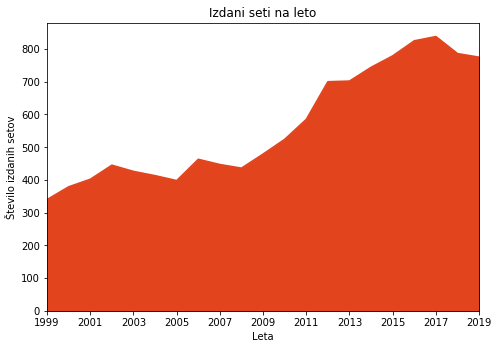

In [3]:
seti_po_letih = sets.groupby('leto')
st_izdanih_setov = seti_po_letih.size()

fig1 = plt.figure(1, figsize=(6, 4))
ax1 = fig1.add_subplot(111, position=[0, 0, 1, 1])
ax1.set_xlim((1998,2020))
st_izdanih_setov.plot(title='Izdani seti na leto', kind='area', color='#E2441D', xticks=[i for i in range(1999,2020,2)])
ax1.set_ylabel('Število izdanih setov')
ax1.set_xlabel('Leta')

Vidimo da Lego, z izjemo kakšnih, vsako leto izda vedno več setov, kar pomeni da imajo oblikovalci setov vedno več dela in potrebujejo pomoč.

- - - - 
## 2. Velikost Lego setov postaja vedno bolj raznolika

Tu si bomo pogledali kako se je splošna velikost setov spreminjala skozi leta. To bomo storili, tako da primerjamo njihovo povprečno količino vsebovanih kock. Ločili pa bomo dva primera, v prvem bomo pogledali povprečje glede na vse izdane sete, v drugem primeru pa se bomo omejili samo na tiste ki kocke dejansko vsebujejo (izločili bomo produkte kot so na primer knjige, oblačila, ure, obeski za ključe ...)

Text(0.5, 0, 'Leto')

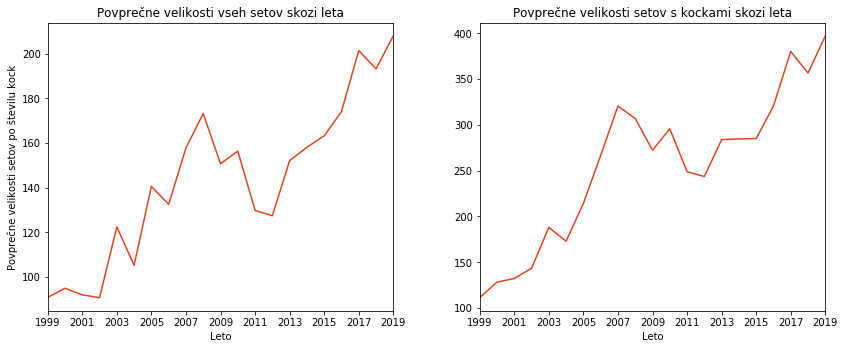

In [4]:
povpr_velikost_setov = seti_po_letih.st_kock.sum() / seti_po_letih.size()
povpr_velikost_setov_s_kockami = seti_po_letih.st_kock.sum() / sets[sets['st_kock'] >= 1].groupby('leto').size()

fig2 = plt.figure(1)
ax2 = fig2.add_subplot(111, position=[0, 0, 0.8, 1])
ax2_ = fig2.add_subplot(111, position=[1, 0, 0.8, 1])
povpr_velikost_setov.plot(title='Povprečne velikosti vseh setov skozi leta', ax=ax2, color='#E2441D', x='leto', xticks=[i for i in range(1999,2020,2)])
povpr_velikost_setov_s_kockami.plot(title='Povprečne velikosti setov s kockami skozi leta', ax=ax2_, color='#E2441D', xticks=[i for i in range(1999,2020,2)])
ax2.set_ylabel('Povprečne velikosti setov po številu kock')
ax2.set_xlabel('Leto')
ax2_.set_xlabel('Leto')

Vidimo da se grafa prav dosti ne razlikujeta, kar pomeni da je delež produktov brez kock skozi leta ostajal __približno enak__. 

Nadalje pa si poglejmo kako so se velikosti setov, spet glede na vsebovanost kock, razlikovale s pomočjo prikaza s šktalo z brki. Za lažjo preglednost bomo letne podatke združili v triletna obdobja.

[Text(0, 0, '1999 - 2001'),
 Text(0, 0, '2002 - 2004'),
 Text(0, 0, '2005 - 2007'),
 Text(0, 0, '2008 - 2010'),
 Text(0, 0, '2011 - 2013'),
 Text(0, 0, '2014 - 2016'),
 Text(0, 0, '2017 - 2019')]

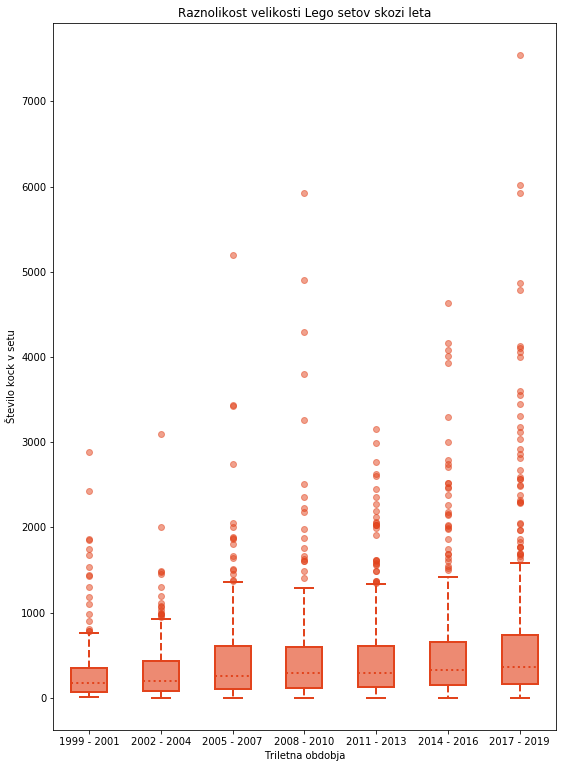

In [5]:
sets['triletna_doba'] = ((sets.leto - 1) // 3) * 3 + 1
df_tri_let = [pd.DataFrame(sets[sets['triletna_doba'] == obdobje].groupby('st_kock'))[0] for obdobje in range(1999,2020,3)]

fig2b = plt.figure(1, figsize=(9,13))
ax2b = fig2b.add_subplot(111)
ax2b.set_ylabel('Število kock v setu')
ax2b.set_xlabel('Triletna obdobja')
ax2b.set_title('Raznolikost velikosti Lego setov skozi leta')
bp2 = ax2b.boxplot(df_tri_let, patch_artist=True, sym='#E2441D')

for box in bp2['boxes']:
    box.set(color='#E2441D', linewidth=2)
    box.set(facecolor = '#ED8A72', alpha=1)

for whisker in bp2['whiskers']:
    whisker.set(color='#E2441D', linewidth=2, linestyle='dashed')

for cap in bp2['caps']:
    cap.set(color='#E2441D', linewidth=2)

for median in bp2['medians']:
    median.set(color='#E2441D', linestyle=':', linewidth=2, marker='', markersize=7)

for flier in bp2['fliers']:
    flier.set(marker='o', alpha=0.5)

ax2b.set_xticklabels([f'{i} - {i + 2}' for i in range(1999,2020,3)])


Vidimo, da se skozi leta prvi kvartil (*Q1*) in tretji kvartil (*Q3*) vedno bolj razmikata. Ta podatek nam pove da je v poznejših letih bila večina setov izdanih v bolj raznolikih velikostih. Splošen trend median, kot tudi število in velikost osamelcev, pa kaže, **da se Lego seti večajo**. Kot zanimivost je *75192-1: Millennium Falcon* največji Lego set do sedaj.

In [6]:
sets[sets.st_kock == sets.st_kock.max()]

,variant,ime_seta,tema,leto,tip_seta,figurice,st_kock,us_cena,eu_cena,us_ppp,eu_ppp,pakiranje,dostopnost,us_cas_izida,eu_cas_izida,triletna_doba
id,,,,,,,,,,,,,,,,
75192,1,Millennium Falcon,Star Wars,2017,normal,8.0,7541.0,799.99,799.99,10.6,10.6,Box,LEGO exclusive,Jan 18,Jan 18,2017


- - - - 
## 3. Ena izmed najpomembnejših karakteristik Lego seta v zbirateljskem svetu

Ta pomembna karakteristika pa je cena po kocki, označeval jo bom z *ppp* (angleško price per piece). Ni presenetljivo zakaj je ravno ta karakteristika tako pomembna, ne le v zbirateljskem svetu pač pa tudi za navadnega kupca. V splošnem pa na nek način tudi kaže kako se je podjetje razvijalo, razlog za to bi lahko bil že da se je povprečna cena kocke nižala, saj jih je bilo preprosto mogoče proizvesti več za enako ceno.

### 3.1 Cena kocke

V prvem delu si bomo pogledali, kako se je cena po kocki spreminjala skozi leta. Te cene pa bomo primerjali v Ameriškem in Evropskem trgu. Predvidevamo, da ne bo prišlo do večjih odstopanj.

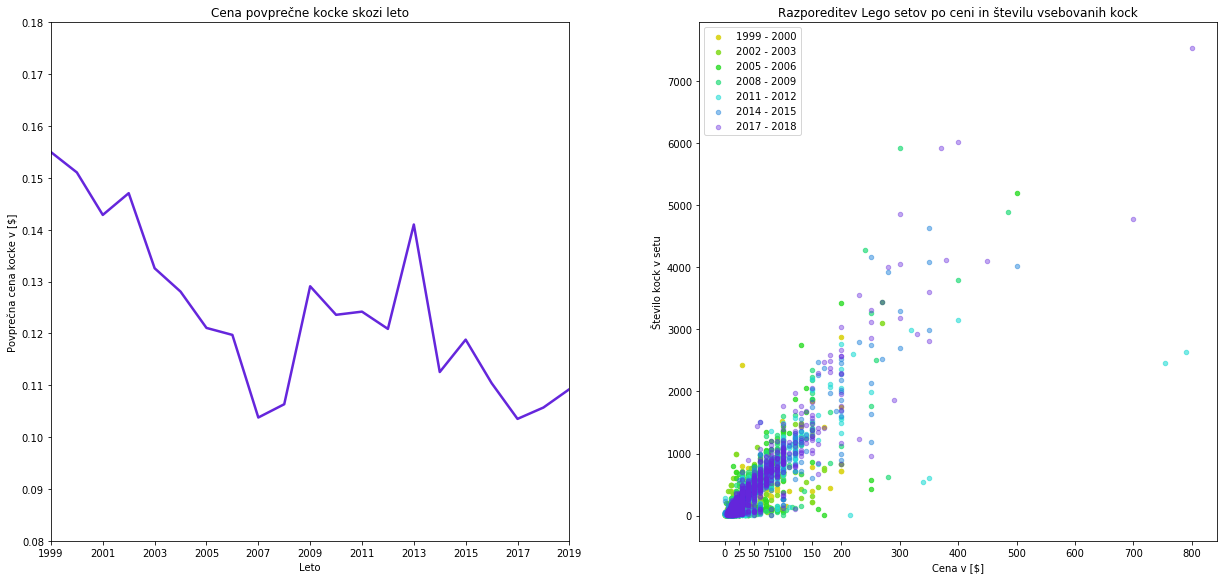

In [7]:
seti_s_kockami = sets[(sets.st_kock >= 1) & (sets.us_cena > 0)]
us_povp_ppp = seti_s_kockami.groupby('leto').us_cena.sum() / seti_s_kockami.groupby('leto').st_kock.sum()

fig3 = plt.figure(1, figsize=(9,9))
ax3a = fig3.add_subplot(111, position=[0,0,0.8,0.8])
ax3b = fig3.add_subplot(121, position=[1,0,0.8,0.8])
colors = ['#DCD626', '#87DC26', '#2CDC26', '#26DC7B', '#26DCD6', '#2687DC', '#6526DC']

us_povp_ppp.plot(ax=ax3a, xticks=[i for i in range(1999,2020,2)], yticks=[0.08 + i * 0.01 for i in range(0,11)], color='#6526DC', linewidth=2.5, title='Cena povprečne kocke skozi leto')

for i in range(1999, 2019, 3):
    sets[sets.triletna_doba == i].plot.scatter(x='us_cena', y='st_kock', ax=ax3b, color=colors[(i - 1999) // 3], alpha=(1 - ((i - 1999) // 3) / 10), label=f'{i} - {i + 1}', xticks=[0,25,50,75,100,150,200,300,400,500,600,700,800], title='Razporeditev Lego setov po ceni in številu vsebovanih kock')

ax3a.set_ylabel('Povprečna cena kocke v [$]')
ax3a.set_xlabel('Leto')
ax3b.set_ylabel('Število kock v setu')
ax3b.set_xlabel('Cena v [$]')
ax3b.legend(loc='best')

Pri raziskovanju 3. poglavja sem ugotovil, da sta kategoriji *us_ppp* in *eu_ppp* v moji bazi podatkov dokaj nezanesljivi, saj se v splošnem ne ujemata dobro z že znanimi objavljenimi rezultati. Zato sem sem odločil da ju izračunam sam. Pri tem sem upošteval le Ameriške cene, torej kategorijo *us_cene*, saj Evropske cene *eu_cene* pred letom 2006 skoraj da niso bile podane, najvrjetneje zaradi Ameriškega izvora spletne strani. 

In [88]:
# to kategorijo si je splacalo shraniti saj jo bom poteboval kasneje
sets['true_ppp'] = round(seti_s_kockami.us_cena / seti_s_kockami.st_kock,2)
sets.true_ppp.median()

0.12

Na splošno je cena kocke skozi leta bila dokaj stabilna, kot je razvidno iz prvega grafa je v zadnjih dvajsetih letih zanihala za največ $0.06. Na drugem grafu pa lahko vidimo kako se seti razporejajo gelde na njihovo ceno in število vsebovanih kock. 

Zanimivo je še opaziti kako pride pri določenih cenah do navpičnih zgostitev. To si lahko preprosto razložimo, saj se je skozi leta mnogokrat izdajalo sete pri istih cenovnih razredih, posamezni seti pri isti ceni pa seveda niso vsebovali enakega števila kock, zato pride to navpične porazdelitve.

### 3.2 Lego seti z nižjim *ppp* vsebuejo več kock

Druga hipoteza ki si jo bomo pogledali v tem poglavju pa je preprosto, ali se nam bolj splača kupovati večje Lego sete. Pri analizi podatkov sem se odločil da za lepši prikaz narišem graf samo za sete katerih *ppp* je manjši od $2.00 po kocki (takih setov je večina) in vsebujejo vsaj 10 kock. Na ta način izločim veliko majhnih setov, ki so zelo specifični (naprimer vsebujejo zgolj kakšno minifiguro, te pa so načeloma v precej dražje od povprečne Lego kocke). O minifigurah pa lahko izvemo več v enem izmed naslednjih poglavji.


No handles with labels found to put in legend.


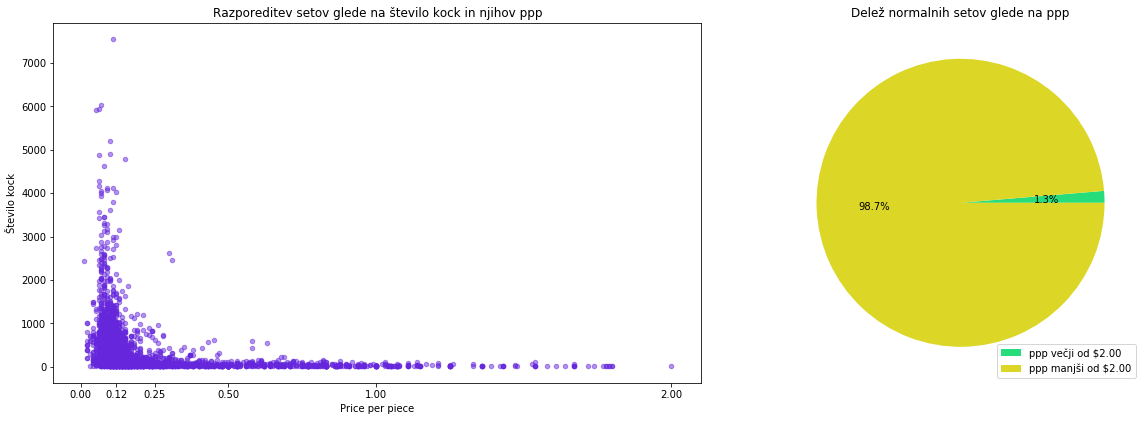

In [89]:
fig32 = plt.figure(1, figsize=(9,5))
ax32a = fig32.add_subplot(111, position=[0,0,1,1])
sets[(sets.true_ppp <= 2) & (sets.st_kock > 10)].plot.scatter(x='true_ppp', y='st_kock', ax=ax32a, color='#6526DC', alpha=0.5, title='Razporeditev setov glede na število kock in njihov ppp', xticks=[0.00, 0.12, 0.25, 0.50, 1.00, 2.00])
ax32a.set_ylabel('Število kock')
ax32a.set_xlabel('Price per piece')

ax32b = fig32.add_subplot(121, position=[0.9,0,1,1])
big_ppp = sets[sets.true_ppp >= 2].true_ppp.count()
normal_ppp = sets[sets.true_ppp < 2].true_ppp.count()
ppp_dilema = pd.DataFrame({'ppp' : [big_ppp, normal_ppp]}, index=['ppp večji od $2.00', 'ppp manjši od $2.00'])
ppp_dilema.plot.pie(subplots=True, ax=ax32b, colors=['#DCD626', '#26DC7B'][::-1], autopct='%0.1f%%', labels=None)
ax32b.set_title('Delež normalnih setov glede na ppp')
ax32b.set_ylabel('')
ax32b.legend(loc=4, labels=ppp_dilema.index)


In [82]:
sets[sets.true_ppp >= 2].head(8)

,variant,ime_seta,tema,leto,tip_seta,figurice,st_kock,us_cena,eu_cena,us_ppp,eu_ppp,pakiranje,dostopnost,us_cas_izida,eu_cas_izida,triletna_doba,true_ppp
id,,,,,,,,,,,,,,,,,
2807,1,Big Wheeler,Duplo,1999,normal,1.0,5.0,10.00,NaN,200.0,200.0,NaN,NaN,NaN,NaN,1999,2.00
2951,1,Lisa,Duplo,2001,normal,2.0,4.0,10.00,NaN,250.0,250.0,NaN,NaN,NaN,NaN,1999,2.50
3748,1,Light Unit for Train,Trains,2001,normal,NaN,4.0,10.00,NaN,250.0,250.0,Polybag,LEGO exclusive,NaN,NaN,1999,2.50
3335,1,Intelligent Train Starter Set,Explore,2002,normal,3.0,25.0,50.00,NaN,200.0,200.0,NaN,NaN,NaN,NaN,2002,2.00
10153,1,Train Motor 9 V,Trains,2002,normal,NaN,3.0,24.99,NaN,833.0,833.0,Box,Retail - limited,Oct 07,Oct 07,2002,8.33
4693,1,Ferrari F1 Race Car,Duplo,2004,normal,1.0,5.0,10.00,NaN,200.0,200.0,NaN,NaN,NaN,NaN,2002,2.00
9911,1,Touch Sensor and Leads,Mindstorms,2004,normal,NaN,3.0,12.00,NaN,400.0,400.0,NaN,NaN,NaN,NaN,2002,4.00
3775,1,Points,Duplo,2005,normal,NaN,2.0,6.99,NaN,349.5,349.5,NaN,NaN,Oct 07,Oct 07,2005,3.50


Kot predvideno, se generalno z večanjem števila kock, ppp približuje izračunani vrednosti mediane ki znaša približno $0.12 po kocki, kar je relativno na nizkem koncu razpona teh vrednosti. 
- - - 

## 4. Popularne teme

Tu si bomo pogledali katere Lego teme so bile v zadnjih dvajstih letih najbolj popularne, kar bomo določili s številom izdanih setov dane teme v posamičnem letu. Najprej poiščimo 15 najbolj izdanih tem: 

In [9]:
vse_teme_series = sets.groupby('tema').size()

keys = vse_teme_series.keys()
vse_teme = pd.DataFrame({'st_setov': [vse_teme_series[key] for key in keys]}, index=keys)
vse_teme.sort_values(by='st_setov', ascending=False).head(18)

,st_setov
tema,
Gear,2194
Star Wars,728
Duplo,716
Collectable Minifigures,614
City,614
...,...
Education,233
Castle,158
Seasonal,157


Teme *Gear, Promotional, Books, Education, Seasonal* in *Miscellaneous* bomo odstranili iz te analize, saj jih ne bomo obravnavali kot pravie teme, ki bi bile posebaj tržene. 

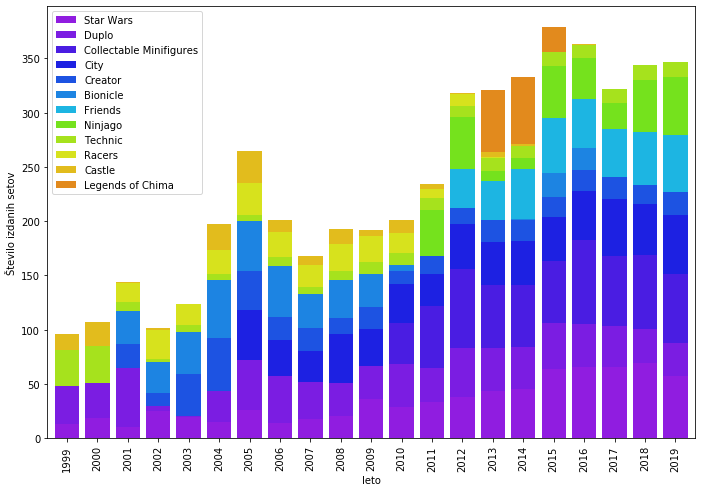

In [10]:
most_pop = ['Star Wars', 'Duplo', 'Collectable Minifigures', 'City', 'Creator', 'Bionicle', 'Friends', 'Ninjago', 'Technic', 'Racers','Castle', 'Legends of Chima']
df_pop_tem = [pd.DataFrame(sets[sets['tema'] == tema].groupby('leto').size()).rename(columns={0: tema}) for tema in most_pop]
letne_teme = pd.concat(df_pop_tem, axis=1)

fig4 = plt.figure(1)
ax4 = fig4.add_subplot(111, position=[0, 0, 1.5, 1.5])
ax4.set_ylabel('Število izdanih setov')
colors = ['#E28A1D', '#E2BC1D', '#D7E21D', '#A6E21D', '#75E21D', '#1DB5E2', '#1D84E2', '#1D53E2', '#1D21E2', '#4A1DE2', '#7B1DE2', '#901DE0'][::-1]
letne_teme.plot(kind='bar', ax=ax4, stacked=True, width=0.8, color=colors)


Kot je bilo potrjeno že v 1. poglavju, se je nasplošno vsako leto izdalo več setov. Skozi celotno obdobje sta se obdržali in bili tud izmed napopularnejših temi *Star Wars* in *Duplo*. Kar precejšen delež izdanih setov pa so po letu 2010 zasedle *Collectable Minifigures*, kar ni presenetljivo glede na to da so po začetni izdaji v 2010 sedaj že v 19 seriji. Med leti 2001 in 2009 pa je pomebno vlogo v poslovni poti podjetja odigrala tema *Bionicle*, ki jim je pomagala pri skorajšnem bankrotu v letu (NEKI). Več o tem pa si lahko preberete na naslednji povezavi.

 - - - - 

## 5. 